In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
image_dir = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/8-F-SFB-1-TEX-2050-CLAHE')

# Neuer Abschnitt

In [ ]:
#filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
#ages = pd.read_csv("/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/2-test/csv/th-220823-6-sfb--1000.csv")

#images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)
#images = pd.concat([filepaths, ages], axis=1)

divide and make integer

In [4]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
ages = pd.read_csv("/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/csv/8-F-SFB-1-TEX-2050-2-old.csv")

In [5]:
ages['SOLAR_IRR_TOTAL'] = ages['SOLAR_IRR_TOTAL'].div(100000).astype(int)

concatinate

In [6]:
images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)
#images = pd.concat([filepaths, ages], axis=1)

In [ ]:
print(images)

                                               Filepath  SOLAR_IRR_TOTAL
0     /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2893
1     /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2880
2     /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2772
3     /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2836
4     /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2678
...                                                 ...              ...
1996  /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2861
1997  /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2827
1998  /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2747
1999  /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2846
2000  /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...             2842

[2001 rows x 2 columns]


**prepare data**
scaling - if applicable

In [ ]:
# Select the (independant) features that we are going to use to train the model
X_lengths = images.loc[:, ["SOLAR_IRR_TOTAL"]]
print(X_lengths)

      SOLAR_IRR_TOTAL
0               63954
1               64392
2               63581
3               63641
4               63359
...               ...
996             63273
997             63968
998             63033
999             63862
1000            64164

[1001 rows x 1 columns]


In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_lengths_scaled = scalerX.fit_transform(X_lengths)

In [ ]:
X_lengths_scaled

array([[ 0.86543678],
       [ 1.72403319],
       [ 0.13425764],
       ...,
       [-0.939968  ],
       [ 0.68509233],
       [ 1.27709259]])

In [ ]:
ages = pd.DataFrame(X_lengths_scaled, columns = ["SOLAR_IRR_TOTAL"])

print(ages)
print(type(ages))

      SOLAR_IRR_TOTAL
0            0.865437
1            1.724033
2            0.134258
3            0.251874
4           -0.300921
...               ...
996         -0.469504
997          0.892880
998         -0.939968
999          0.685092
1000         1.277093

[1001 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
images

,Filepath,SOLAR_IRR_TOTAL
0,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-1.949505
1,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,0.589039
2,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-0.606723
3,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-0.275438
4,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-0.179385
...,...,...
996,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-0.004921
997,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-1.085028
998,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,-0.906643
999,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,0.518470


**prepare data**
grayscaling + contrast

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import glob 
import os
import seaborn as sns
import os.path

In [ ]:
filepaths

0       /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
1       /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
2       /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
3       /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
4       /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
                              ...                        
1996    /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
1997    /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
1998    /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
1999    /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
2000    /content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...
Name: Filepath, Length: 2001, dtype: object

**OPEN CV**

APPLY CLAHE

In [ ]:
#from https://stackoverflow.com/questions/60761218/writing-multiple-images-with-opencv2-in-python

from google.colab.patches import cv2_imshow

path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/0-GT-real/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))
    cl1 = clahe.apply(gray)
   
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-CLAHE/' + name + '_CLA.jpg', cl1)



BINARY GLOBAL THRESHOLDING

In [ ]:
#from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

from google.colab.patches import cv2_imshow

path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-3-HIST-CLAHE/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, th = cv.threshold(gray,127,255,cv.THRESH_BINARY)
       
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-3-HIST-CLAHE-BI/' + name + '_BITH.jpg', th)

BINARY ADAPTIVE MEAN THRESHOLDING

In [ ]:
#from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

from google.colab.patches import cv2_imshow

path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-2-GS-CLAHE/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
   
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-2-GS-CLAHE-GA/' + name + '_BITH.jpg', th2)

ADAPTIVE GAUSSCHEN THRESHOLDING

In [ ]:
#from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

from google.colab.patches import cv2_imshow

path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-6-1folder/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
   
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-2-GS-GA/' + name + '_BITH.jpg', th3)

HISTOGRAM EQUALIZATION

In [ ]:
from google.colab.patches import cv2_imshow

# function of histogram equalization 
# from https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=TZEybZ7toJD9
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]



path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/0-GT-real/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    hist = histeq(img)
   
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-HIST/' + name + '_HIST.jpg', hist)

GAUSSCHEN BLUR + OTSUS THRESHOLDING

In [ ]:
#from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

from google.colab.patches import cv2_imshow

path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/7-test5-cor-val/real-2/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray,(5,5),0)
    ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
   
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/7-test5-cor-val/real-5-GAU-OTSU/' + name + '_GAU-OTSU.jpg', th3)

In [ ]:
def change_brightness(img, value=30):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    return img

In [ ]:
#https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Global_Thresholding_Adaptive_Thresholding_Otsus_Binarization_Segmentations.php
img = cv.imread('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real2/5/Kopie von PXL_20220817_124515703.jpg',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#bilateral filter
img = change_brightness(img, value=30)
bilblur = cv.bilateralFilter(img,9,75,75)
ret4,th4 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3,
          bilblur,0, th4]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding",
          'Bilateral filtered Image','Histogram',"Otsu's Thresholding",]

for i in range(4):
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

original = cv.imread('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real2/5/Kopie von PXL_20220817_124515703.jpg')
brighter = original + (80, 80, 80) 
cv2_imshow(original)  
cv2_imshow(brighter)


BRIGHTNESS

In [ ]:
from google.colab.patches import cv2_imshow

path = "/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real2/*.jpg"

for file in glob.glob(path):
    img = cv.imread(file)
    brighter = img + (80, 80, 80)
    gray = cv.cvtColor(brighter, cv.COLOR_BGR2GRAY) 
   
    basename = os.path.basename(file)  # e.g. MyPhoto.jpg
    name = os.path.splitext(basename)[0]  # e.g. MyPhoto
    cv.imwrite('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real-7-BR/' + name + '_BR.jpg', gray)

In [ ]:
#https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Global_Thresholding_Adaptive_Thresholding_Otsus_Binarization_Segmentations.php
img = cv.imread('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/1-AVALANCHE test/real2/5/Kopie von PXL_20220817_124515703.jpg',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,    
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

histogramms

In [ ]:
hist = cv.calcHist([gray[1]],[0],None,[256],[0,256])

In [ ]:
hist

In [ ]:
hist1,bins = np.histogram(gray[1].ravel(),256,[0,256])

In [ ]:
I=pd.Series(hist1)

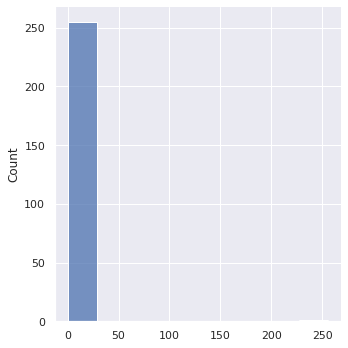

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot( I, )

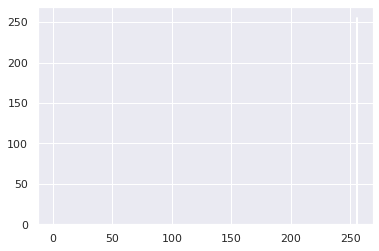

In [ ]:
plt.hist(gray[1].ravel(),256,[0,256]); plt.show()

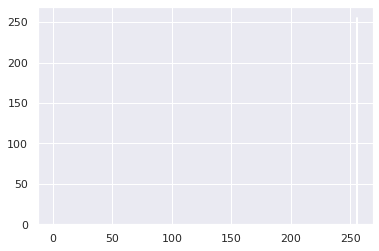

In [ ]:
plt.hist(cl1[2].ravel(),256,[0,256]); plt.show()

**contrast-adaptive histogram equalization**

**SPLIT INTO TRAIN AND TEST**

In [7]:
# Let's only use 5000 images to speed up training time
image_df = images.sample(1000, random_state=1).reset_index(drop=True)

train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=2)

In [8]:
# IMAGE NORMALIZATION 

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [9]:
train_df

,Filepath,SOLAR_IRR_TOTAL
175,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2878
818,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2749
677,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2696
952,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2800
200,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2722
...,...,...
534,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2800
584,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2850
493,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2856
527,/content/gdrive/MyDrive/z1_THESIS/A4_thesis-wo...,2829


**analyze**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0aaebe090>]],
      dtype=object)

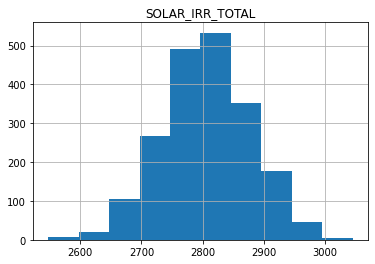

In [ ]:
images.hist("SOLAR_IRR_TOTAL")

In [ ]:
#https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=TZEybZ7toJD9
plt.hist(filepaths.ravel(),bins = 256, range = [0,256]) 
plt.show()

**DATAPIPELINE**

In [10]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='SOLAR_IRR_TOTAL',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 640 validated image filenames.


In [11]:

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='SOLAR_IRR_TOTAL',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 160 validated image filenames.


In [12]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='SOLAR_IRR_TOTAL',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)


Found 200 validated image filenames.


**TRAINING - pretrained models**

RESNET 50

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input

input_tensor = Input(shape=(256, 256, 1))

base_model = ResNet50(
    include_top=False, weights=None, input_tensor=input_tensor,
    input_shape=None)

In [14]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model=Model(inputs=base_model.input,outputs=outputs)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  3200        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

# Important, calculate a valid step size for the validation dataset
STEP_SIZE_VALID=val_images.n//val_images.batch_size

model.compile(loss = 'mean_squared_error', optimizer='adam', 
              metrics=[RootMeanSquaredError(name="rmse")])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=50, verbose=1, mode='auto',
        restore_best_weights=True)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
       )
    ]
)

**TRAINING - with early stopping**

In [ ]:
inputs = tf.keras.Input(shape=(256, 256, 1))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='mse', optimizer='adam')

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
20/20 [==============================] - 18s 870ms/step - loss: 7882045.5000 - val_loss: 7873351.0000
Epoch 2/100
20/20 [==============================] - 17s 847ms/step - loss: 7856672.0000 - val_loss: 7802523.0000
Epoch 3/100
20/20 [==============================] - 18s 902ms/step - loss: 7639097.5000 - val_loss: 7305723.0000
Epoch 4/100
20/20 [==============================] - 17s 836ms/step - loss: 6522608.0000 - val_loss: 5218618.5000
Epoch 5/100
20/20 [==============================] - 18s 901ms/step - loss: 3211630.2500 - val_loss: 863582.0000
Epoch 6/100
20/20 [==============================] - 17s 835ms/step - loss: 212838.9219 - val_loss: 147401.9531
Epoch 7/100
20/20 [==============================] - 17s 834ms/step - loss: 39764.2891 - val_loss: 21678.3633
Epoch 8/100
20/20 [==============================] - 17s 836ms/step - loss: 11624.3232 - val_loss: 7054.7437
Epoch 9/100
20/20 [==============================] - 18s 895ms/step - loss: 6736.5054 - val_loss: 54

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 16)      800       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 125, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 115, 115, 32)      61984     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 57, 57, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 32)               0   

**training**

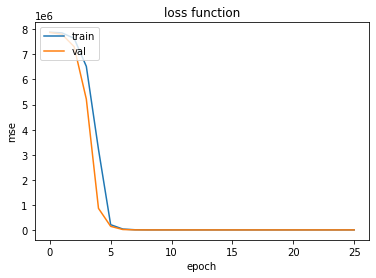

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**prediction**

In [ ]:
#pretrained 
predicted_ages = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
#print("     Test RMSE: {:.5f}".format(rmse))

print(rmse)

r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))


77.99006785221917
Test R^2 Score: -0.11592


In [ ]:
predicted_ages = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

In [ ]:
null_rmse = np.sqrt(np.sum((true_ages - np.mean(true_ages))**2) / len(true_ages))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 73.82830


**safe ML modell**

In [ ]:
#https://www.tensorflow.org/guide/keras/save_and_serialize
import joblib
model.save("th-220906-OUR.h5")

scalerX_filename = "th-220818-scalerX.save"
#joblib.dump(scalerX, scalerX_filename)

**load ML modell**

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_h5_model.h5")

# Let's check:
np.testing.assert_allclose(
    model.predict(test_input), reconstructed_model.predict(test_input)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(test_input, test_target)

**test from REAL FACADES**

In [ ]:
# from https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb
# https://www.youtube.com/watch?v=nU_T2PPigUQ&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN

#DONT RUN

df_test = pd.read_csv(
    os.path.join(SOURCE,"test.csv"), 
    na_values=['NA', '?'])

df_test['filename']="clips-"+df_test["id"].astype(str)+".jpg"

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=SOURCE,
        x_col="filename",
        batch_size=1,
        shuffle=False,
        target_size=(256, 256),
        class_mode=None)

In [ ]:
#testing data - rendered with smooth texture
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/8-F-SFB-1-TEX-50')

In [ ]:
#testing data - rendered with smooth texture - real topographies remodelled + simulated + rendered
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/0-GT-render')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - no openCV
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/0-GT-real')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - HISTOGRAM EQUALIZATION
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-HIST')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - CLAHE - openCV
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-CLAHE')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - BINARY ADAPTIVE MEAN - openCV
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-BI_ADAME')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - BINARY ADAPTIVE MEAN - openCV
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-BI_GLOBAL')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - BINARY ADAPTIVE GAUSSIAN - openCV
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-BI_ADAGA')

In [ ]:
#testing data - real pictures - real topographies remodelled + simulated + actual shots - BINARY GAUSSIAN OTSU THRESHOLDING - openCV
image_dir1 = Path('/content/gdrive/MyDrive/z1_THESIS/A4_thesis-work/8-test-final/a1-GT-real-GAU-OTSU')

In [ ]:
# predictions on REAL FACADES


test_images = test_generator.flow_from_directory(
    directory=image_dir1,
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=1,
    shuffle=False
)

Found 10 images belonging to 10 classes.


In [ ]:
predicted_ages = np.squeeze(model.predict(test_images))

In [ ]:
print(predicted_ages)

[2999.6816 2545.1208 3308.329  2963.162  3351.9036 2633.4897 1999.221
 1999.221  3314.0183 2485.2234]


In [ ]:
#inverse scaling

predictions = scalerX.inverse_transform(predicted_ages)

In [ ]:
filenames=test_generator.filepaths
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predicted_ages})
results.to_csv("results.csv",index=False)